# Gom cụm dữ liệu MNIST với thuật toán K-Means
Notebook này thực hiện gom cụm dữ liệu MNIST bằng thuật toán K-Means và so sánh kết quả với nhãn thực tế.

## 1. Import các thư viện cần thiết

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.optimize import linear_sum_assignment

student = 'Hồ Thành Đạt - 6351071017'

print("Đã import thành công các thư viện!")

Đã import thành công các thư viện!


## 2. Tải và chuẩn bị dữ liệu MNIST

In [24]:
print(student)
# Tải dữ liệu MNIST
print("Đang tải dữ liệu MNIST...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target

# Chuyển đổi nhãn sang kiểu int
y = y.astype(int)

# Sử dụng subset để giảm thời gian tính toán (có thể điều chỉnh)
n_samples = 10000  # Sử dụng 10,000 mẫu
indices = np.random.choice(len(X), n_samples, replace=False)
X_sample = X.iloc[indices] if hasattr(X, 'iloc') else X[indices]
y_sample = y.iloc[indices] if hasattr(y, 'iloc') else y[indices]

# Chuẩn hóa dữ liệu
X_sample = X_sample / 255.0

print(f"Kích thước dữ liệu: {X_sample.shape}")
print(f"Số lượng nhãn: {len(np.unique(y_sample))}")
print(f"Phân bố các nhãn:\n{pd.Series(y_sample).value_counts().sort_index()}")

Hồ Thành Đạt - 6351071017
Đang tải dữ liệu MNIST...
Kích thước dữ liệu: (10000, 784)
Số lượng nhãn: 10
Phân bố các nhãn:
class
0    1033
1    1112
2     985
3    1020
4     969
5     909
6     958
7    1048
8     934
9    1032
Name: count, dtype: int64


## 3. Hiển thị một số ví dụ từ dữ liệu

Hồ Thành Đạt - 6351071017


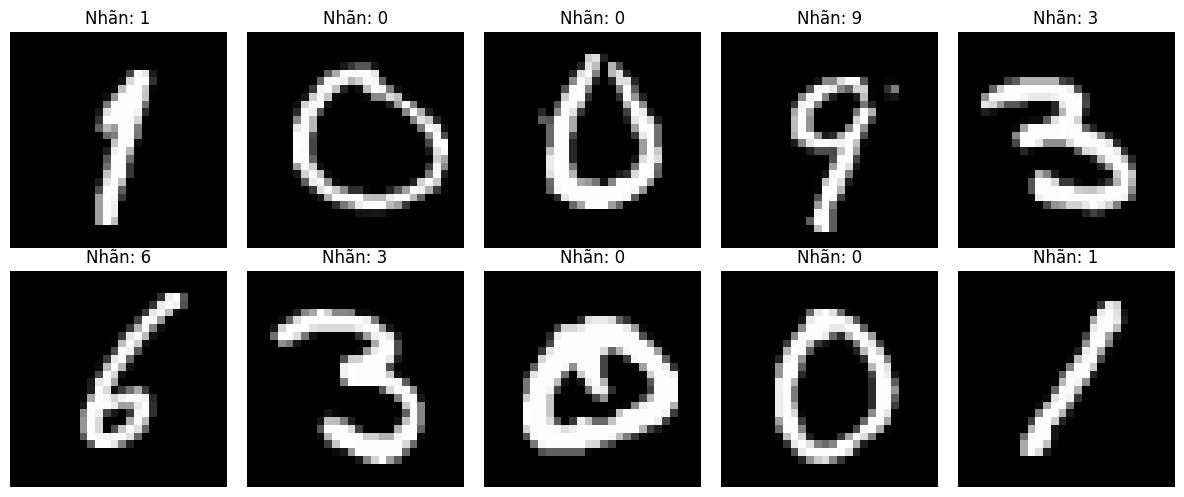

In [25]:
print(student)
# Hiển thị 10 ảnh mẫu
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    if hasattr(X_sample, 'iloc'):
        image = X_sample.iloc[i].values.reshape(28, 28)
    else:
        image = X_sample[i].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Nhãn: {y_sample.iloc[i] if hasattr(y_sample, "iloc") else y_sample[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

## 4. Thực hiện thuật toán K-Means

In [26]:
print(student)
# Số cụm bằng số chữ số (0-9)
n_clusters = 10

print(f"Đang thực hiện K-Means với {n_clusters} cụm...")
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, max_iter=300, verbose=1)
cluster_labels = kmeans.fit_predict(X_sample)

print("\nHoàn thành gom cụm!")
print(f"Inertia (tổng bình phương khoảng cách): {kmeans.inertia_:.2f}")

Hồ Thành Đạt - 6351071017
Đang thực hiện K-Means với 10 cụm...
Initialization complete
Iteration 0, inertia 653385.1237677814.
Iteration 1, inertia 410516.61612359836.
Iteration 2, inertia 400869.3513534778.
Iteration 3, inertia 397268.88086277136.
Iteration 4, inertia 395845.58577758237.
Iteration 5, inertia 395062.74755126436.
Iteration 6, inertia 394568.8722089747.
Iteration 7, inertia 394229.8176900677.
Iteration 8, inertia 393953.9075456418.
Iteration 9, inertia 393677.0147543474.
Iteration 10, inertia 393358.94617224246.
Iteration 11, inertia 393056.4372336246.
Iteration 12, inertia 392747.1585589869.
Iteration 13, inertia 392537.31576254254.
Iteration 14, inertia 392412.00110371114.
Iteration 15, inertia 392321.6507878858.
Iteration 16, inertia 392275.94436029036.
Iteration 17, inertia 392248.2427196991.
Iteration 18, inertia 392230.93451260764.
Iteration 19, inertia 392224.1253392071.
Iteration 20, inertia 392221.51196474436.
Iteration 21, inertia 392218.87023626885.
Iteration 

## 5. Ánh xạ cụm với nhãn thực tế

In [27]:
print(student)
# Tạo ma trận confusion để ánh xạ cụm với nhãn
def map_clusters_to_labels(cluster_labels, true_labels):
    """
    Ánh xạ các cụm với nhãn thực tế sử dụng Hungarian algorithm
    """
    # Tạo ma trận chi phí
    n_clusters = len(np.unique(cluster_labels))
    n_classes = len(np.unique(true_labels))
    cost_matrix = np.zeros((n_clusters, n_classes))

    for i in range(n_clusters):
        for j in range(n_classes):
            cost_matrix[i, j] = -np.sum((cluster_labels == i) & (true_labels == j))

    # Sử dụng Hungarian algorithm
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Tạo mapping
    mapping = {row: col for row, col in zip(row_ind, col_ind)}

    # Áp dụng mapping
    mapped_labels = np.array([mapping[label] for label in cluster_labels])

    return mapped_labels, mapping

mapped_labels, cluster_mapping = map_clusters_to_labels(cluster_labels, y_sample)

print("Ánh xạ cụm -> nhãn:")
for cluster, label in sorted(cluster_mapping.items()):
    print(f"  Cụm {cluster} -> Chữ số {label}")

Hồ Thành Đạt - 6351071017
Ánh xạ cụm -> nhãn:
  Cụm 0 -> Chữ số 2
  Cụm 1 -> Chữ số 4
  Cụm 2 -> Chữ số 5
  Cụm 3 -> Chữ số 6
  Cụm 4 -> Chữ số 9
  Cụm 5 -> Chữ số 8
  Cụm 6 -> Chữ số 7
  Cụm 7 -> Chữ số 1
  Cụm 8 -> Chữ số 3
  Cụm 9 -> Chữ số 0


## 6. Đánh giá kết quả gom cụm

In [28]:
print(student)
# Tính các metrics
ari = adjusted_rand_score(y_sample, cluster_labels)
nmi = normalized_mutual_info_score(y_sample, cluster_labels)
silhouette = silhouette_score(X_sample, cluster_labels, sample_size=5000)
accuracy = np.mean(mapped_labels == y_sample)

print("=" * 50)
print("KẾT QUẢ ĐÁNH GIÁ GOM CỤM")
print("=" * 50)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Accuracy (sau khi ánh xạ): {accuracy:.4f} ({accuracy*100:.2f}%)")
print("=" * 50)

Hồ Thành Đạt - 6351071017
KẾT QUẢ ĐÁNH GIÁ GOM CỤM
Adjusted Rand Index (ARI): 0.3674
Normalized Mutual Information (NMI): 0.5039
Silhouette Score: 0.0588
Accuracy (sau khi ánh xạ): 0.5112 (51.12%)


## 7. Ma trận nhầm lẫn (Confusion Matrix)

Hồ Thành Đạt - 6351071017


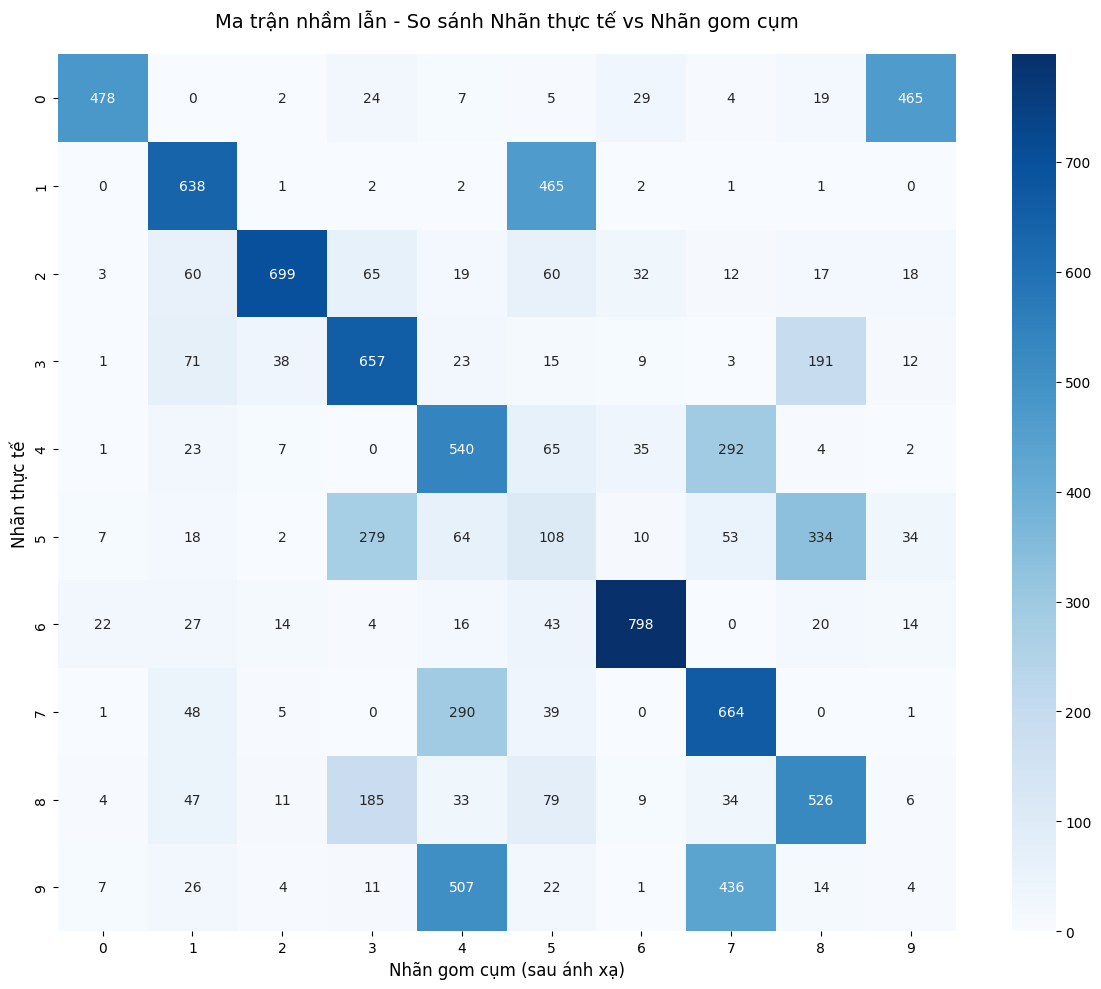


Độ chính xác theo từng chữ số:
  Chữ số 0: 0.4627 (46.27%)
  Chữ số 1: 0.5737 (57.37%)
  Chữ số 2: 0.7096 (70.96%)
  Chữ số 3: 0.6441 (64.41%)
  Chữ số 4: 0.5573 (55.73%)
  Chữ số 5: 0.1188 (11.88%)
  Chữ số 6: 0.8330 (83.30%)
  Chữ số 7: 0.6336 (63.36%)
  Chữ số 8: 0.5632 (56.32%)
  Chữ số 9: 0.0039 (0.39%)


In [29]:
print(student)
# Tạo confusion matrix
cm = confusion_matrix(y_sample, mapped_labels)

# Vẽ confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Ma trận nhầm lẫn - So sánh Nhãn thực tế vs Nhãn gom cụm', fontsize=14, pad=20)
plt.ylabel('Nhãn thực tế', fontsize=12)
plt.xlabel('Nhãn gom cụm (sau ánh xạ)', fontsize=12)
plt.tight_layout()
plt.show()

# Hiển thị accuracy cho từng chữ số
print("\nĐộ chính xác theo từng chữ số:")
for i in range(10):
    digit_accuracy = cm[i, i] / cm[i, :].sum() if cm[i, :].sum() > 0 else 0
    print(f"  Chữ số {i}: {digit_accuracy:.4f} ({digit_accuracy*100:.2f}%)")

## 8. Trực quan hóa kết quả bằng PCA

Hồ Thành Đạt - 6351071017
Đang thực hiện PCA để trực quan hóa...
Phương sai được giải thích: 0.1693


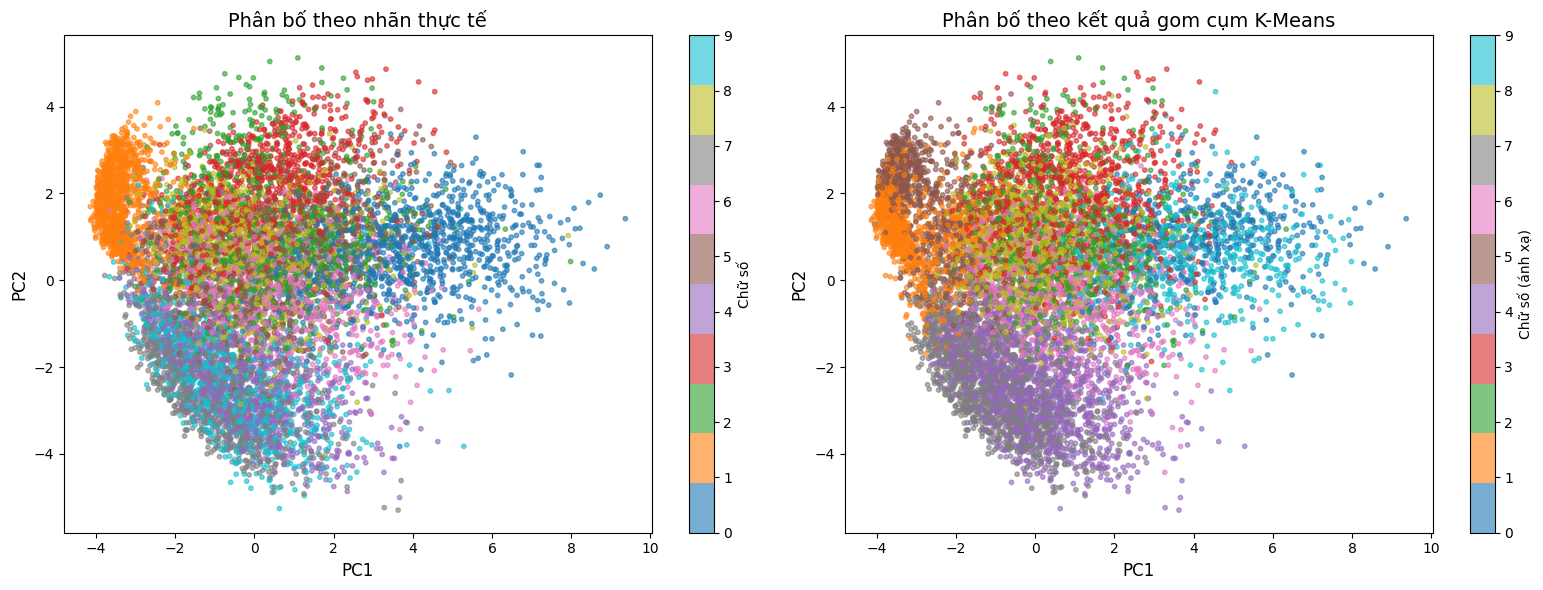

In [30]:
print(student)
# Giảm chiều dữ liệu xuống 2D bằng PCA
print("Đang thực hiện PCA để trực quan hóa...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sample)

print(f"Phương sai được giải thích: {pca.explained_variance_ratio_.sum():.4f}")

# Vẽ kết quả
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Nhãn thực tế
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='tab10', alpha=0.6, s=10)
axes[0].set_title('Phân bố theo nhãn thực tế', fontsize=14)
axes[0].set_xlabel('PC1', fontsize=12)
axes[0].set_ylabel('PC2', fontsize=12)
plt.colorbar(scatter1, ax=axes[0], label='Chữ số')

# Nhãn gom cụm
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=mapped_labels, cmap='tab10', alpha=0.6, s=10)
axes[1].set_title('Phân bố theo kết quả gom cụm K-Means', fontsize=14)
axes[1].set_xlabel('PC1', fontsize=12)
axes[1].set_ylabel('PC2', fontsize=12)
plt.colorbar(scatter2, ax=axes[1], label='Chữ số (ánh xạ)')

plt.tight_layout()
plt.show()

## 9. Hiển thị ví dụ từ mỗi cụm

Hồ Thành Đạt - 6351071017


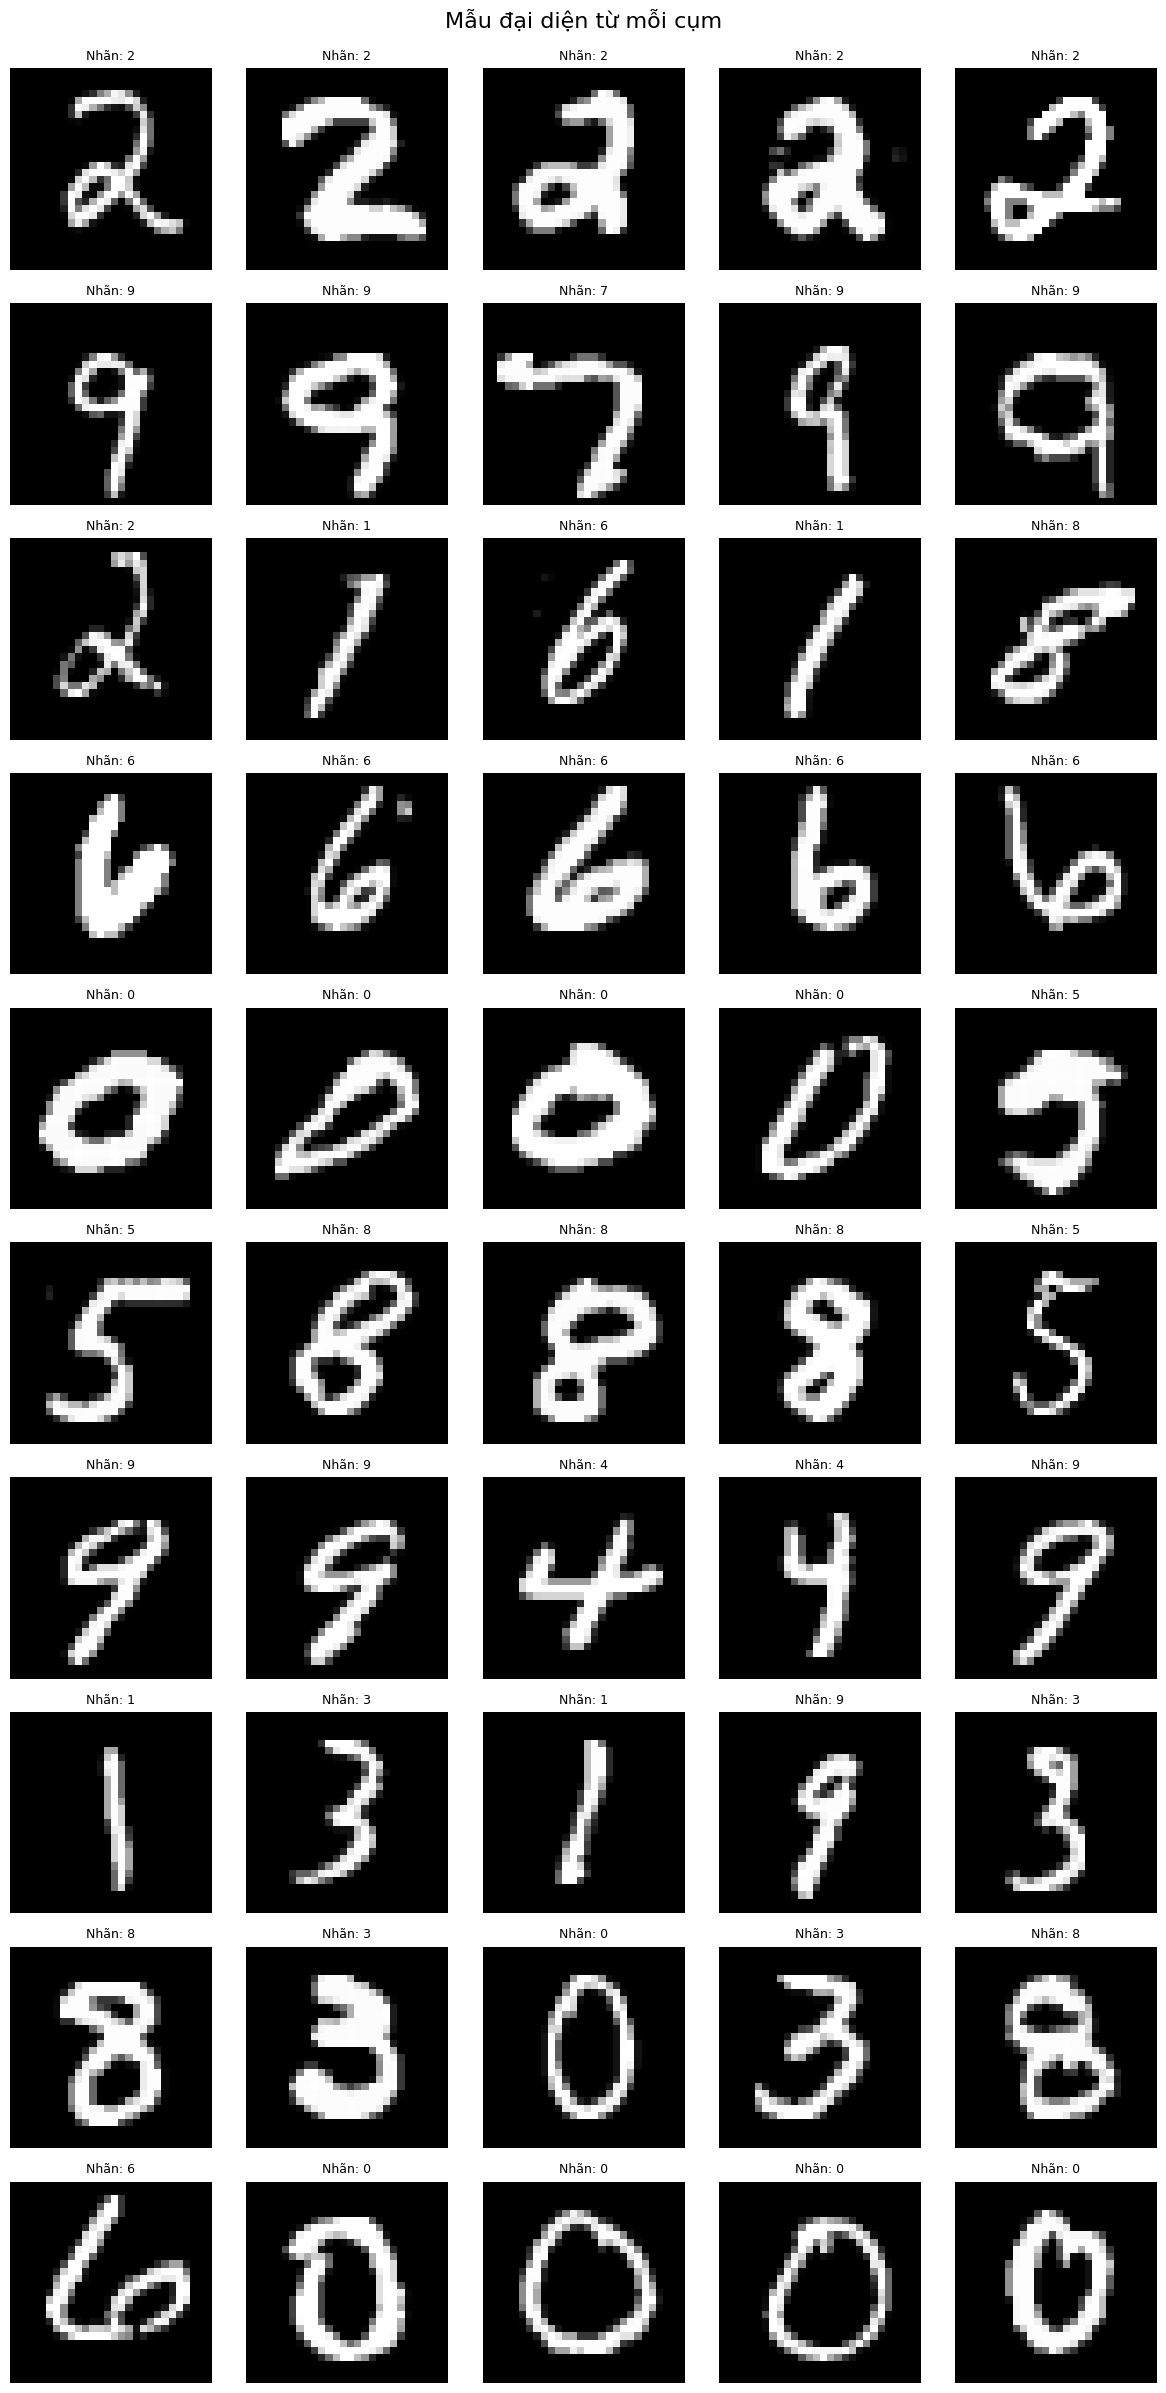

In [31]:
print(student)
# Hiển thị 5 ảnh đại diện từ mỗi cụm
fig, axes = plt.subplots(10, 5, figsize=(12, 24))

for cluster in range(10):
    # Lấy các indices của cụm hiện tại
    cluster_indices = np.where(cluster_labels == cluster)[0]

    # Lấy 5 mẫu ngẫu nhiên
    sample_indices = np.random.choice(cluster_indices, min(5, len(cluster_indices)), replace=False)

    for i, idx in enumerate(sample_indices):
        if hasattr(X_sample, 'iloc'):
            image = X_sample.iloc[idx].values.reshape(28, 28)
        else:
            image = X_sample[idx].reshape(28, 28)

        axes[cluster, i].imshow(image, cmap='gray')
        true_label = y_sample.iloc[idx] if hasattr(y_sample, 'iloc') else y_sample[idx]
        axes[cluster, i].set_title(f'Nhãn: {true_label}', fontsize=9)
        axes[cluster, i].axis('off')

    # Thêm label cho cụm
    axes[cluster, 0].set_ylabel(f'Cụm {cluster}\n(→{cluster_mapping[cluster]})',
                                fontsize=10, rotation=0, labelpad=40, va='center')

plt.suptitle('Mẫu đại diện từ mỗi cụm', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

## 10. Phân tích các lỗi gom cụm

Hồ Thành Đạt - 6351071017
Số lượng mẫu bị gom cụm sai: 4888/10000 (48.88%)


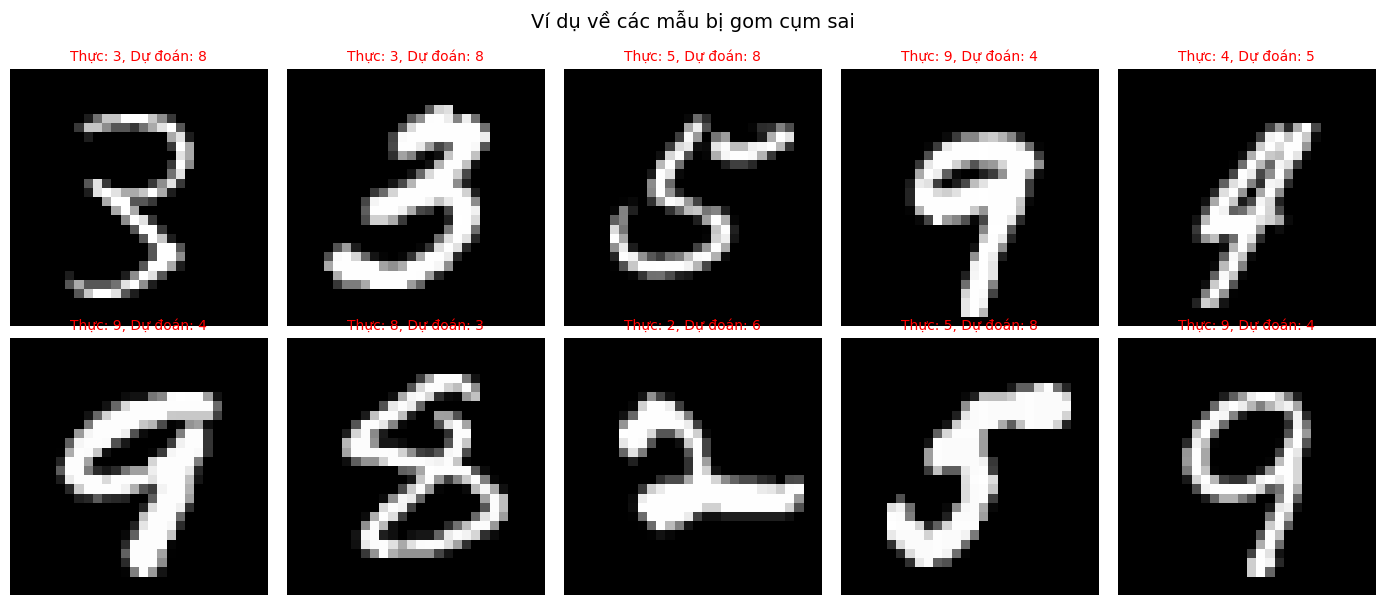

In [32]:
print(student)
# Tìm các mẫu bị phân loại sai
misclassified = mapped_labels != y_sample
n_misclassified = np.sum(misclassified)

print(f"Số lượng mẫu bị gom cụm sai: {n_misclassified}/{len(y_sample)} ({n_misclassified/len(y_sample)*100:.2f}%)")

# Hiển thị 10 ví dụ bị gom cụm sai
if n_misclassified > 0:
    misclassified_indices = np.where(misclassified)[0]
    sample_misclassified = np.random.choice(misclassified_indices, min(10, n_misclassified), replace=False)

    fig, axes = plt.subplots(2, 5, figsize=(14, 6))
    for i, idx in enumerate(sample_misclassified):
        ax = axes[i // 5, i % 5]
        if hasattr(X_sample, 'iloc'):
            image = X_sample.iloc[idx].values.reshape(28, 28)
        else:
            image = X_sample[idx].reshape(28, 28)

        ax.imshow(image, cmap='gray')
        true_label = y_sample.iloc[idx] if hasattr(y_sample, 'iloc') else y_sample[idx]
        pred_label = mapped_labels[idx]
        ax.set_title(f'Thực: {true_label}, Dự đoán: {pred_label}', fontsize=10, color='red')
        ax.axis('off')

    plt.suptitle('Ví dụ về các mẫu bị gom cụm sai', fontsize=14, y=1.00)
    plt.tight_layout()
    plt.show()

## 11. Tổng kết

In [33]:
print(student)
print("\n" + "="*60)
print("TỔNG KẾT KẾT QUẢ GOM CỤM K-MEANS TRÊN DỮ LIỆU MNIST")
print("="*60)
print(f"\nSố mẫu sử dụng: {n_samples}")
print(f"Số cụm (K): {n_clusters}")
print(f"\nCác chỉ số đánh giá:")
print(f"  - Độ chính xác: {accuracy*100:.2f}%")
print(f"  - Adjusted Rand Index: {ari:.4f}")
print(f"  - Normalized Mutual Information: {nmi:.4f}")
print(f"  - Silhouette Score: {silhouette:.4f}")
print(f"\nKết luận:")
print(f"  K-Means đã gom cụm {'tốt' if accuracy > 0.7 else 'khá' if accuracy > 0.5 else 'cần cải thiện'} ")
print(f"  trên dữ liệu MNIST với độ chính xác {accuracy*100:.2f}%.")
print(f"  Thuật toán có thể phân biệt được các chữ số khác nhau")
print(f"  dựa trên đặc trưng hình ảnh mà không cần nhãn.")
print("="*60)

Hồ Thành Đạt - 6351071017

TỔNG KẾT KẾT QUẢ GOM CỤM K-MEANS TRÊN DỮ LIỆU MNIST

Số mẫu sử dụng: 10000
Số cụm (K): 10

Các chỉ số đánh giá:
  - Độ chính xác: 51.12%
  - Adjusted Rand Index: 0.3674
  - Normalized Mutual Information: 0.5039
  - Silhouette Score: 0.0588

Kết luận:
  K-Means đã gom cụm khá 
  trên dữ liệu MNIST với độ chính xác 51.12%.
  Thuật toán có thể phân biệt được các chữ số khác nhau
  dựa trên đặc trưng hình ảnh mà không cần nhãn.
